In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("./data/admissions.csv")

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


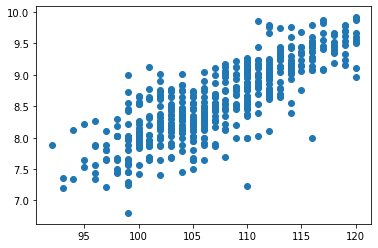

In [5]:
x=data["TOEFL Score"]
y=data["CGPA"]

plt.scatter(x,y)

In [6]:
lr = LinearRegression()
x=data["TOEFL Score"].values.reshape(-1,1)
y=data["CGPA"]

lr.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
lr.coef_

array([0.08060768])

In [8]:
lr.intercept_

-0.06405858019865107

0.6570294577557595

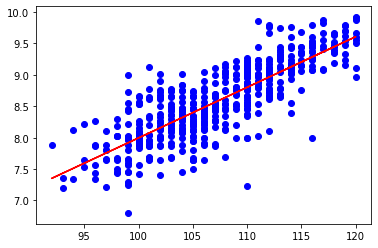

In [12]:
yPredict = lr.predict(x)
plt.scatter(x,y, c = "blue")
plt.plot(x,yPredict, c = "red")
lr.score(x,y)


In [15]:
lr2=LinearRegression()
x2 = data[['GRE Score', 'TOEFL Score']]
x2.head()
y = data ["CGPA"]


,GRE Score,TOEFL Score
0,337,118
1,324,107
2,316,104
3,322,110
4,314,103


ValueError: x and y must be the same size

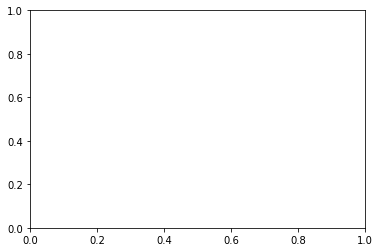

In [22]:
lr2.fit(x2,y)
yPredict = lr2.predict(x2)

#its 3d
#plt.scatter(x2,y)
plt.plot(x2, yPredict)


In [19]:
lr2.score(x2,y)

0.7334855538010305

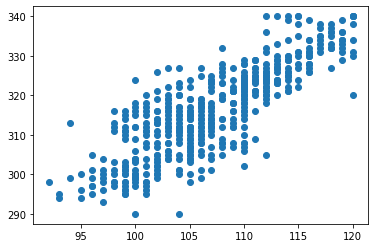

In [24]:
plt.scatter(data["TOEFL Score"], data["GRE Score"])
#need to make sure that the independent 
#variables are not related - multicolinearity

In [25]:
from sklearn.datasets import load_boston


In [28]:
data = load_boston()
#data
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [29]:
df = pd.DataFrame(data['data'],columns = data['feature_names'])

In [30]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [31]:
#create new column
df["MEDV"] = data['target']

In [32]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [33]:
import statsmodels.api as sm

In [38]:
x = sm.add_constant(df.drop('MEDV', axis = 1))
#add intersept


In [39]:
result = sm.OLS(df["MEDV"],x).fit()


In [40]:
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 02 Dec 2019   Prob (F-statistic):          6.72e-135
Time:                        17:28:43   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [41]:
results = sm.OLS(df["MEDV"],x.drop("INDUS", axis = 1)).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Mon, 02 Dec 2019   Prob (F-statistic):          6.42e-136
Time:                        17:34:40   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3639      5.091      7.143      0.0